# **Project (Facial Landmark Detection) Summary:-**
## *In this Project we are trying to detect different Landmarks available on face. Also it's highlighting all the landmarks there. So it can detect human face properly.*

In [1]:
# Importing important libraries.

import cv2
import numpy as np
import dlib
from imutils import face_utils
from google.colab.patches import cv2_imshow

In [2]:
# Importing Javafile to access webcam in google colab.

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


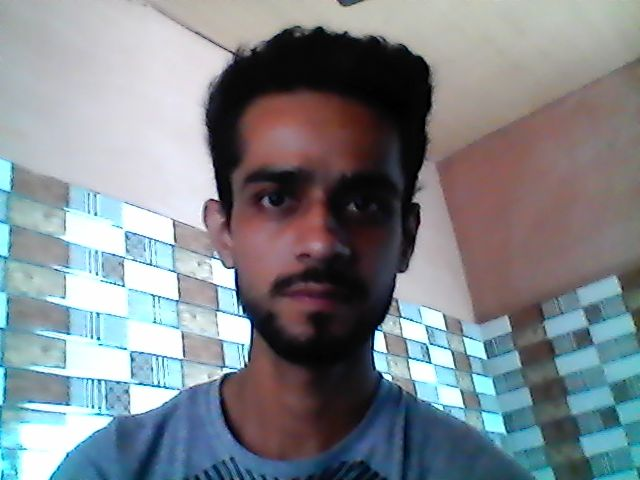

In [3]:
# Displaying the picture and saving it there.

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [4]:
# Initializing the face detector and landmark detector there.

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [5]:
# Status marking for current state.

sleep = 0
drowsy = 0
active = 0
status=""
color=(0,0,0)

In [6]:
def compute(ptA,ptB):
  dist = np.linalg.norm(ptA - ptB)
  return dist

def blinked(a,b,c,d,e,f):
  up = compute(b,d) + compute(c,e)
  down = compute(a,f)
  ratio = up/(2.0*down)

         #Checking if it is blinked
  if ratio>0.25:
    return 2
  elif ratio >0.21 and ratio <=0.25:
    return 1
  else:
    return 0

[[[167 167 161]
  [167 167 161]
  [166 166 160]
  ...
  [158 176 169]
  [158 176 169]
  [158 176 169]]

 [[165 165 159]
  [165 165 159]
  [165 165 159]
  ...
  [156 174 167]
  [156 174 167]
  [155 173 166]]

 [[162 163 154]
  [163 164 155]
  [164 165 156]
  ...
  [154 172 165]
  [153 171 164]
  [153 171 164]]

 ...

 [[255 241 104]
  [176 143   4]
  [159 123   0]
  ...
  [168 176  83]
  [135 142  51]
  [ 86  93   2]]

 [[246 210  68]
  [167 133   0]
  [192 157  13]
  ...
  [170 180  87]
  [145 154  63]
  [111 120  29]]

 [[255 226  79]
  [155 121   0]
  [190 157   8]
  ...
  [170 180  87]
  [157 166  75]
  [144 153  62]]]


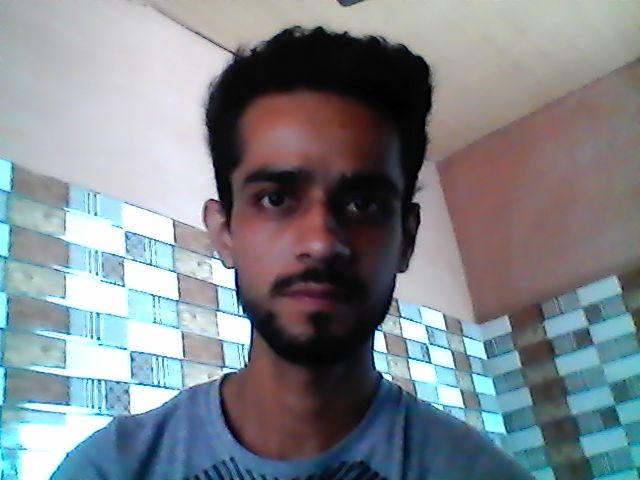

In [7]:
#Initializing the camera and taking the instance

#cap = cv2.VideoCapture(1)
#while True:
  #ret,frame = cap.read()
frame = cv2.imread('photo.jpg')
print(frame)
cv2_imshow(frame)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
#detected face in faces array
for face in faces:
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()
  face_frame = frame.copy()
  cv2.rectangle(face_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
  landmarks = predictor(gray, face)
  landmarks = face_utils.shape_to_np(landmarks)
  #The numbers are actually the landmarks which will show eye
  left_blink = blinked(landmarks[36],landmarks[37], 
       landmarks[38], landmarks[41], landmarks[40], landmarks[39])
  right_blink = blinked(landmarks[42],landmarks[43], 
          landmarks[44], landmarks[47], landmarks[46], landmarks[45])
        
    #Now judge what to do for the eye blinks
  if left_blink==0 or right_blink==0:
    sleep+=1
    drowsy=0
    active=0
    if sleep>6:
      status="SLEEPING !!!"
      color = (255,0,0)
    elif left_blink==1 or right_blink==1:
      sleep=0
      active=0
      drowsy+=1
      if drowsy>6:
        status="Drowsy !"
        color = (0,0,255)
      else:
        drowsy=0
        sleep=0
        active+=1
        if active>6:
          status="Active :)"
          color = (0,255,0)
  cv2.putText(frame, status, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color,3)
  for n in range(0, 68):
    (x,y) = landmarks[n]
    cv2.circle(face_frame, (x, y), 1, (255, 255, 255), -1)

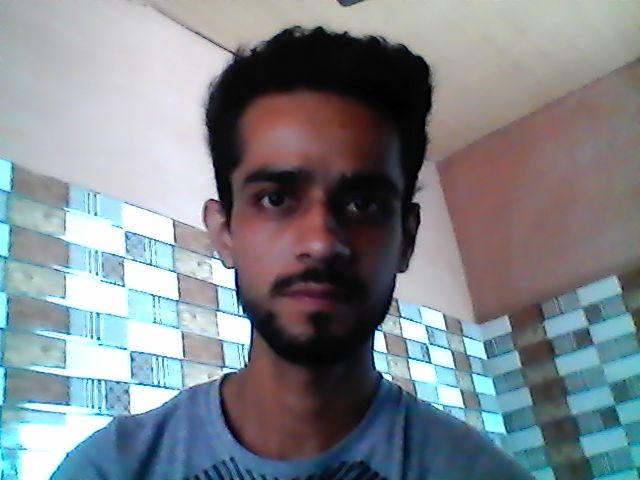

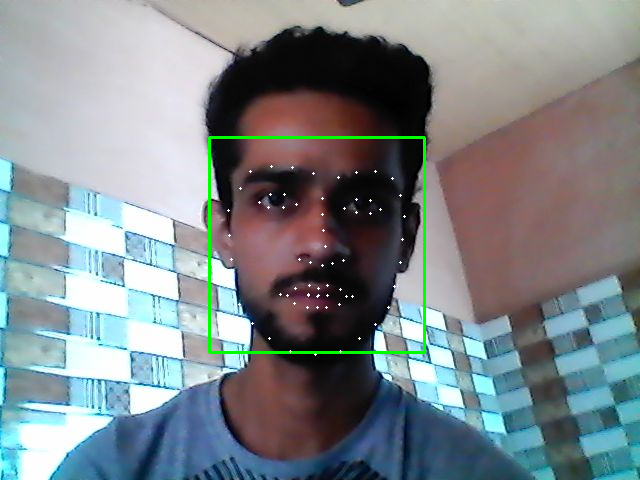

In [8]:
# Showing photo and creating facial landmarks on the picture.

cv2_imshow(frame)
cv2_imshow(face_frame)
key = cv2.waitKey(1)
#if key == 27:
#  break
print(status)

In [9]:
# Destroying the windows.

cv2.destroyAllWindows()